In [0]:
%tensorflow_version 1.x

In [0]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize 
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
import warnings 
from sklearn import datasets, linear_model
from urllib.parse import urlparse
import re
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
allurlcsv = pd.read_csv("dataset.csv")
allurlsdata = pd.DataFrame(allurlcsv)

In [0]:
allurlsdata.replace(('benign', 'malicious'), (1, 0), inplace=True)
urls= allurlsdata['url']

urls= urls
labels = allurlsdata['label']
labels=labels


In [0]:
count1=0
count0=0
for i in labels:
  if i ==1:
    count1+=1
  if i ==0:
    count0+=1

print (count1," ", count0," ", count1+count0)
print (allurlsdata.shape)

345738   104438   450176
(450176, 2)


In [0]:
NewdataSet=[]
inc=0
for i in urls:
  temp = re.split(r'[/?#_.-]', urls[inc])
  #temp = urls[inc].split('.')
  #temp=getTokens(urls[inc])
  NewdataSet.append(temp)
  inc=inc+1

In [0]:
print (NewdataSet[0])

['https:', '', 'www', 'manta', 'com', 'c', 'mm5l7zp', 'oakland', 'durant', 'rockridge', 'mason']


In [0]:
#!pip install pytorch-pretrained-bert
#  this is bulllshit rn xD

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
'''
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
% matplotlib inline
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
'''

100%|██████████| 231508/231508 [00:00<00:00, 313574.85B/s]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(NewdataSet, labels, test_size=0.2)
# print (X_train ,y_train)
print (np.array(X_train).shape, np.array(y_train).shape)

print(len(X_test))
print (len(y_test))

(360140,) (360140,)
90036
90036


In [0]:
modelvector = gensim.models.Word2Vec(X_train, min_count = 1, size = 100, window = 5, sg = 1,workers =8)
modelvectortest = gensim.models.Word2Vec(X_test, min_count = 1, size = 100, window = 5, sg = 1,workers =8)

In [0]:
modelvector.wv["www"]

array([ 0.42393222,  1.1485606 ,  0.213014  ,  0.8557657 ,  0.7298924 ,
        0.36959904,  0.39970717,  0.46873748,  0.4974297 ,  0.2484271 ,
       -0.33176363, -0.29304263, -1.2087067 ,  0.77207375,  0.01169918,
       -0.09167103,  0.9936276 ,  0.7108558 ,  0.12517841,  0.04605875,
        0.37057653, -0.23862663,  0.29127216,  0.24998915,  0.2658815 ,
        0.51182926, -0.12964584,  0.07308665, -0.5912335 ,  0.11530853,
        0.7910765 , -0.34097394,  0.6099328 ,  0.06554966,  0.6013811 ,
        0.23953104, -1.1123054 , -0.10510845,  0.35310572,  0.51563936,
        0.6758655 , -0.59538674, -0.57320803,  0.09725108,  1.4429013 ,
       -0.18300246,  0.17297848, -0.07263404,  0.58732873,  0.09192385,
        0.2450387 ,  0.7351587 ,  1.1750369 , -0.20377114, -0.8427031 ,
       -0.69786716,  0.03570656,  0.5558317 ,  0.5485922 , -0.5816495 ,
       -0.9287901 , -0.07268063, -0.38633052,  0.41280204, -0.16479206,
       -0.00413173, -0.32759893, -0.45207322,  0.44232255,  0.01

In [0]:
pretrained_weights = modelvector.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)

def word2idx(word):
  return modelvector.wv.vocab[word].index
def idx2word(idx):
  return modelvector.wv.index2word[idx]

Result embedding shape: (399723, 100)


In [0]:
pretrained_weights_test = modelvectortest.wv.syn0
vocab_size_test, emdedding_size_test = pretrained_weights_test.shape
print('Result embedding shape:', pretrained_weights_test.shape)

def word2idx_test(word):
  return modelvectortest.wv.vocab[word].index
def idx2word_test(idx):
  return modelvectortest.wv.index2word[idx]

Result embedding shape: (139164, 100)


In [0]:
col=len(max(NewdataSet,key=len))
row=len(X_train)
print (col)
trainXf = np.zeros([len(X_train), col], dtype=np.int32)
train_y = np.zeros([len(y_train)], dtype=np.int32)

testXf = np.zeros([len(X_test), col], dtype=np.int32)
test_y = np.zeros([len(y_test)], dtype=np.int32)

for sublist in range(len(X_train)): 
    for val in range(len(X_train[sublist])):
     trainXf[sublist][val]=word2idx(X_train[sublist][val]) 
      # print (word2idx(X_train[sublist][val])  )

for sublist in range(len(X_test)): 
    for val in range(len(X_test[sublist])):
     testXf[sublist][val]=word2idx_test(X_test[sublist][val]) 
      # print (word2idx(X_train[sublist][val])  )


208


In [0]:
print(trainXf.shape)
print (train_y.shape)

print (testXf.shape)
print (y_test.shape)

#print (y_test.head)
#print("asdd")
#print (testXf.head)


(360140, 208)
(360140,)
(90036, 208)
(90036,)


In [0]:
import csv
# name of csv file  
filename = "trainXf.csv"
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerows(trainXf) 

filename = "testXf.csv"
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerows(testXf) 



In [0]:
#start the code from here if running for the second time
allurlcsv = pd.read_csv("trainXf.csv",header=None)
trainXf = pd.DataFrame(allurlcsv)
allurlcsv = pd.read_csv("testXf.csv",header=None)
testXf = pd.DataFrame(allurlcsv)

train_y=y_train
test_y= y_test

In [0]:
print(trainXf.shape)
print (train_y.shape)

print (testXf.shape)
print (y_test.shape)


(360140, 208)
(360140,)
(90036, 208)
(90036,)


In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import chardet
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# random forest model creation
rfc1 = RandomForestClassifier(n_estimators=200)
rfc1.fit(trainXf,train_y)

# predictions
rfc_predict = rfc1.predict(testXf)


In [0]:

print("=== Confusion Matrix ===")
print(confusion_matrix(test_y, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_y, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
#print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 88   0]
 [  0 112]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       112

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



=== All AUC Scores ===


=== Mean AUC Score ===


In [0]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#testXf.fillna(testXf.mean())
#trainXf.fillna(trainXf.mean())
#test_y.fillna(test_y.mean())
#train_y.fillna(train_y.mean())

#dropping
#X_test.drop(['url_domain_len', 'url_path_len'], axis=1)
#X_train.drop(['url_domain_len', 'url_path_len'], axis=1)

# Feature scaling
scaler = StandardScaler()
scaler.fit(trainXf)
trainXf = scaler.transform(trainXf)
testXf = scaler.transform(testXf)

# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 20, 10), max_iter=1000)
mlp.fit(trainXf,train_y)

predictions = mlp.predict(testXf)

#mlp_cv_score = cross_val_score(mlp, X, y, cv=10, scoring='roc_auc')

# Last thing: evaluation of algorithm performance in classifying flowers
print("=== Confusion Matrix ===")
print(confusion_matrix(test_y,predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_y,predictions))

=== Confusion Matrix ===
[[ 88   0]
 [  0 112]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       112

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [0]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(trainXf, train_y)
y_predict = NB.predict(testXf)
print('\n')
print("Accuracy NB: {:.2f}".format(NB.score(testXf, test_y)))
print('\n')



Accuracy NB: 0.99




#Use this code for naive bayes. (train and test variables idk kon se likhne hain, wo edit kr k run krna hai ye)

In [0]:
'''
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(trainXf, y_train)
y_pred = nb.predict(testXf)

print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))
'''

'\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\n\nnb = MultinomialNB()\nnb.fit(trainXf, y_train)\ny_pred = nb.predict(testXf)\n\nprint(accuracy_score(y_test, y_pred))\n\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\n\nprint(classification_report(y_test, y_pred))\n'

In [0]:
print(trainXf.shape)
print (train_y.shape)

print (testXf.shape)
print (y_test.shape)
train_y=y_train
test_y= y_test

(799, 33)
(799,)
(200, 33)
(200,)


In [0]:
train_y[0:5]

331    1
454    1
568    0
619    0
743    0
Name: label, dtype: int64

In [0]:
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation


model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))
#model.add(Dropout(0.2))
model.add(LSTM(units=emdedding_size))

model.add(Dense(1, activation='sigmoid'))


#model.add(Dropout(0.2))
#model.add(Dense(units=vocab_size))

#model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#model.add(Activation('softmax'))h
#model.add(Dense(60, input_dim=60, activation='relu'))
#model.add(Dense(units=1))

#model.add(Activation('sigmoid'))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
'''
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
'''
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         39972300  
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 40,052,801
Trainable params: 40,052,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit the model
model.fit(np.array(trainXf),np.array(y_train), epochs=10, verbose=1,validation_split=0.2,workers=8)


Train on 288112 samples, validate on 72028 samples
Epoch 1/10
288112/288112 [==============================] - 1363s 5ms/step - loss: 0.5422 - accuracy: 0.7682 - val_loss: 0.5420 - val_accuracy: 0.7683
Epoch 2/10
111488/288112 [==========>...................] - ETA: 13:09 - loss: 0.5398 - accuracy: 0.7698

In [0]:
# evaluate the model
loss, accuracy = model.evaluate(np.array(testXf) , np.array(test_y), verbose=0)
print('Accuracy: %f' % (accuracy*100))
'''
p = model.predict(np.array(testXf))
#why is it not over fitting, why would it?too much training, 100 oekp ocsisnt much training.lets test itruk




good=[]
for i in p:
  if i <0.5:
     good.append(0)
    
  if i >0.5:
    good.append(1)

count=0
g=0
b=0
for i in good:
  if i == y_test.iloc[count]:
    g=g+1
  if i != y_test.iloc[count]:
    b=b+1
  count+=1

  
print ("good",g)
print ("bad",b)
print ((g/(g+b))*100)
'''
print ('loss of' , loss)

Accuracy: 97.000003
loss of 0.12111038506031037


In [0]:
p=model.predict(testXf)
count1=0
count0=0
for i in p:
  if i ==1:
    count1+=1

  if i==0:
    count0+=1

print (count1," ", count0," ", count1+count0)

print (p)

In [0]:
# predict probabilities for test set
yhat_probs = model.predict(testXf, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testXf, verbose=0)

In [0]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [0]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score,accuracy_score


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, yhat_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(test_y, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(test_y, yhat_probs)
#print('ROC AUC: %f' % auc)


Accuracy: 0.970000
Precision: 0.949153
Recall: 1.000000
F1 score: 0.973913
Cohens kappa: 0.938675


Abnormal: ROC AUC=0.500
Normal: ROC AUC=0.999


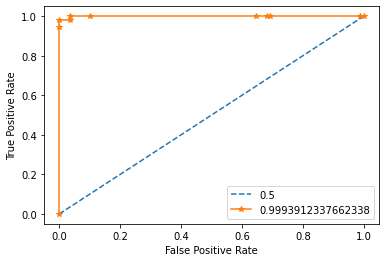

In [0]:
import matplotlib.pyplot as plt
ns_probs=[0 for _ in range(len(y_test))]
# # keep probabilities for the positive outcome only
# lr_probs = yhat_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, yhat_probs)

# summarize scores
print('Abnormal: ROC AUC=%.3f' % (ns_auc))
print('Normal: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, yhat_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--',label=ns_auc)
plt.plot(lr_fpr, lr_tpr, marker='*',label=lr_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
# confusion matrix
cf_matrix = confusion_matrix(test_y, yhat_classes)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix, 
  index = [ 'Malicious', 'Benign'],
  columns = ['Malicious', 'Benign'])
# sns.heatmap(df_cm, annot=True)

[[ 82   6]
 [  0 112]]


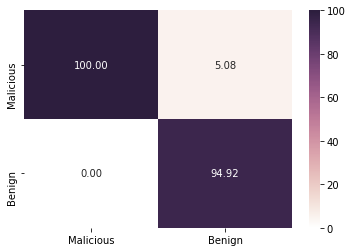

In [0]:
import seaborn as sns

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.2%', cmap='Blues') #for better look divide by 2
sns.heatmap(df_cm/np.sum(df_cm)*100, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
